## TASK 6: HELSINKI IT SOLUTIONS OY - ASSIGNMENT USING POWER BI FOR DECISION MAKING 

# Task 1: helsinki_it_analysis.py
- Q1.We discuss how AI could support decision-making at “HELSINKI IT SOLUTIONS OY”
- Q2.(for example, by predicting employee attrition, segmenting markets, forecasting revenue, etc.) and
- Q3.then produce several plots that help managers decide where to invest resources.
- Q4. We can also load these CSV files into Power BI for further exploration.


# Task 2: (Additional tasks)
- Below is an end‐to‐end example that meets all your tasks.
- This example creates sample CSV files for employees, employers, and business branches (with data from various cities/countries) and then uses
- Python code to load the CSVs, process them, perform visual analytics (including a simple AI example), and print discussion points
- Answering tasks Q1, Q2, Q3, Q4 . and Taks: A, B, C, D. We can also load these CSV files into Power BI for further exploration.
- In our example:
- • Task 2: (Additional tasks)
- A. The code prints out various summaries and prompts you to view each plot step by step (you can take screenshots of the outputs).
- B. The sample CSV files are created (employees.csv, employers.csv, business.csv) that you can later upload to Power BI.
- C. You are pointed to "Microsoft’s Power BI" - AI sample documentation.
- D. Our code and visualizations reflect "our best effort in combining AI" (a very basic predictive model.
- Which is demonstrated on synthetic employee attrition data) with decision-support visualizations.
- Simply save the entire code below as (for example) "helsinki_it_analysis.py" and we can run it from a terminal.
- Each plot is displayed step by step (press Enter between plots).


Loading employee data...
Loading employer data...
Loading business data...

Employees Data Preview:
  employee_id first_name last_name  age        city  country  department  \
0        E001       John       Doe   35    Helsinki  Finland          IT   
1        E002       Anna  Svensson   28   Stockholm   Sweden          IT   
2        E003       Lars  Johansen   42        Oslo   Norway  Management   
3        E004      Maria   Nielsen   30  Copenhagen  Denmark          IT   
4        E005      Peter    Muller   38      Berlin  Germany          IT   

    position  salary   hire_date  
0  Developer    4500  2018-06-01  
1  Developer    4000  2019-04-15  
2    Manager    6000  2016-01-10  
3     Tester    3500  2020-09-20  
4  Developer    4800  2017-11-05  

Employers Data Preview:
  employer_id              company_name        city  country  \
0       EM001  HELSINKI IT SOLUTIONS OY    Helsinki  Finland   
1       EM002            Nordic Tech AB   Stockholm   Sweden   
2       EM003   


STEP 6.1: Press Enter to display the Employee Salary Distribution plot... 


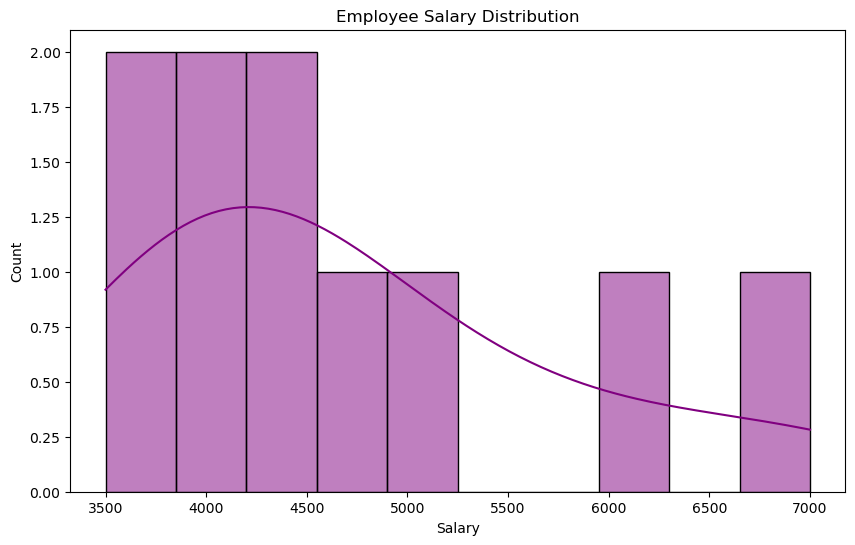


STEP 6.2: Press Enter to display the Average Employee Salary by City plot... 


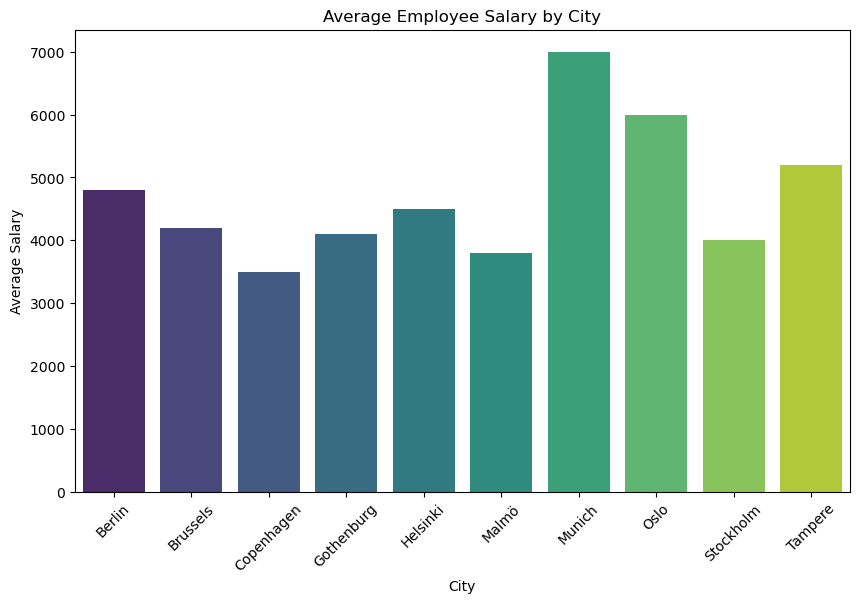


STEP 6.3: Press Enter to display the Employer Revenue vs. Number of Employees plot... 


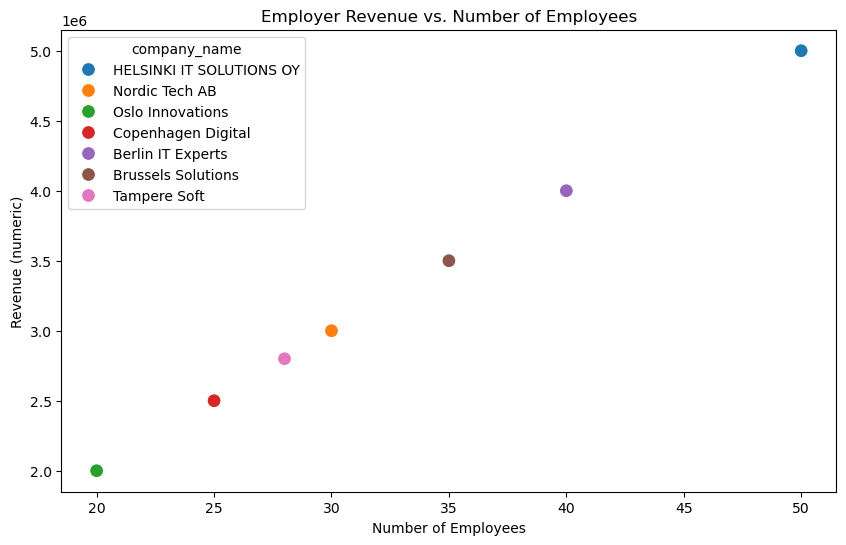


STEP 6.4: Press Enter to display the Employer Count by Country plot... 


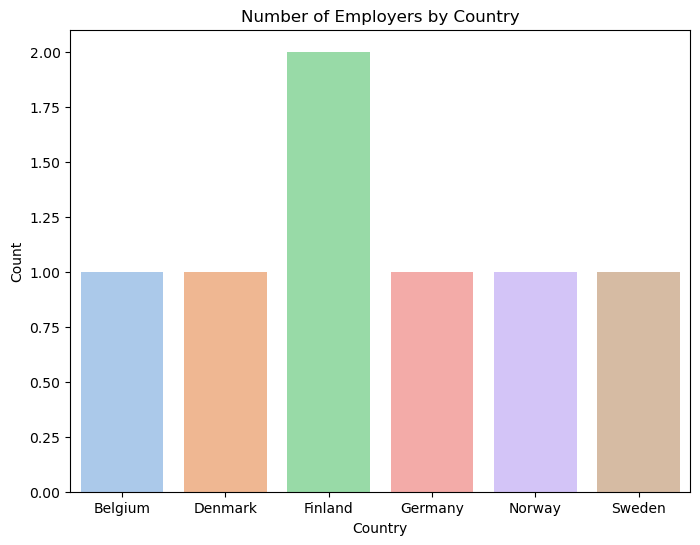


STEP 6.5: Press Enter to display the Annual Revenue by Business Branch plot... 


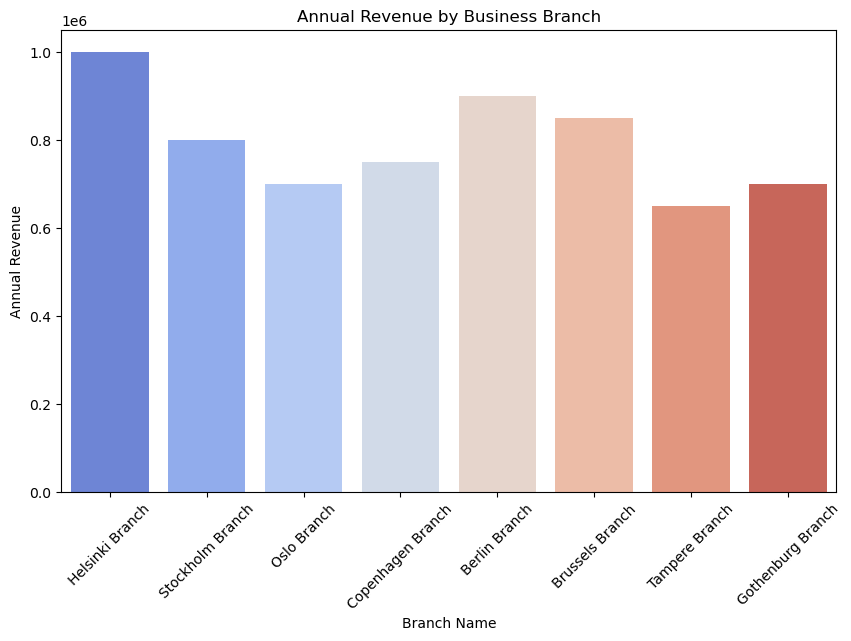


STEP 6.6: Press Enter to display the Employee Count by Business Branch plot... 


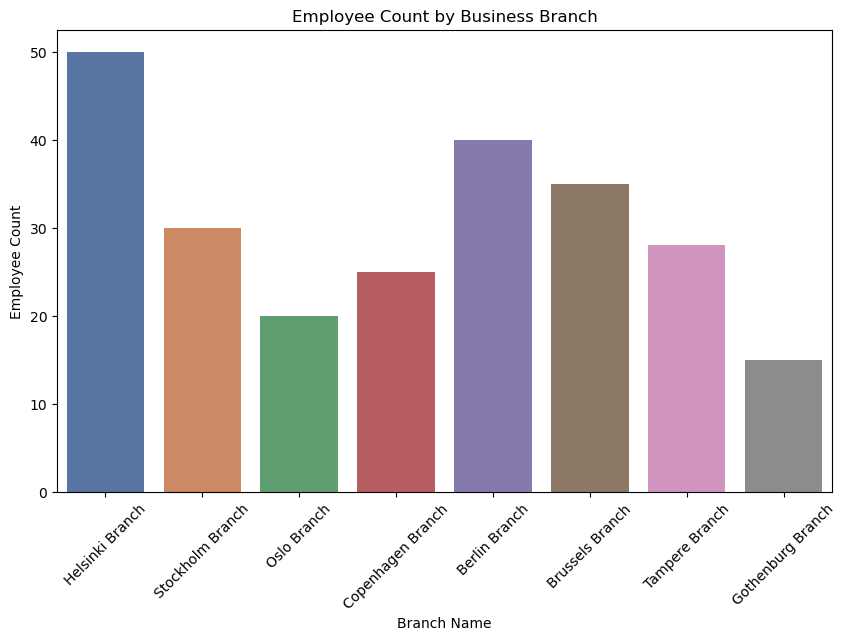


STEP 6.7: Press Enter to exit the program. 


In [4]:
# =============================================================================
# STEP 1: Import Required Libraries
# =============================================================================
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings







# Suppress warnings for a cleaner output
warnings.filterwarnings("ignore")

# ============================================================================= 
# STEP 2: Create Sample CSV Files
# =============================================================================
def create_sample_csv_files():
    # --- Create employees.csv ---
    employees_csv = """employee_id,first_name,last_name,age,city,country,department,position,salary,hire_date
E001,John,Doe,35,Helsinki,Finland,IT,Developer,4500,2018-06-01
E002,Anna,Svensson,28,Stockholm,Sweden,IT,Developer,4000,2019-04-15
E003,Lars,Johansen,42,Oslo,Norway,Management,Manager,6000,2016-01-10
E004,Maria,Nielsen,30,Copenhagen,Denmark,IT,Tester,3500,2020-09-20
E005,Peter,Muller,38,Berlin,Germany,IT,Developer,4800,2017-11-05
E006,Sofie,Dupont,34,Brussels,Belgium,HR,Recruiter,4200,2018-03-12
E007,Jukka,Korhonen,45,Tampere,Finland,IT,Team Lead,5200,2015-07-03
E008,Erik,Larsson,29,Gothenburg,Sweden,IT,Developer,4100,2019-10-01
E009,Ingrid,Eriksson,31,Malmö,Sweden,Marketing,Specialist,3800,2021-01-15
E010,Klaus,Schneider,40,Munich,Germany,Management,Director,7000,2014-05-20
"""
    with open("employees.csv", "w") as f:
        f.write(employees_csv)
    
    # --- Create employers.csv ---
    employers_csv = """employer_id,company_name,city,country,industry,num_employees,revenue,established_year
EM001,"HELSINKI IT SOLUTIONS OY",Helsinki,Finland,IT Solutions,50,5M,2010
EM002,Nordic Tech AB,Stockholm,Sweden,Software,30,3M,2012
EM003,Oslo Innovations,Oslo,Norway,IT Consulting,20,2M,2015
EM004,Copenhagen Digital,Copenhagen,Denmark,Digital Services,25,2.5M,2011
EM005,Berlin IT Experts,Berlin,Germany,IT Services,40,4M,2009
EM006,Brussels Solutions,Brussels,Belgium,Tech,35,3.5M,2013
EM007,Tampere Soft,Tampere,Finland,Software,28,2.8M,2016
"""
    with open("employers.csv", "w") as f:
        f.write(employers_csv)
    
    # --- Create business.csv ---
    business_csv = """business_id,branch_name,city,country,sector,annual_revenue,employee_count
B001,"Helsinki Branch",Helsinki,Finland,IT Solutions,1M,50
B002,"Stockholm Branch",Stockholm,Sweden,Software Solutions,0.8M,30
B003,"Oslo Branch",Oslo,Norway,IT Consulting,0.7M,20
B004,"Copenhagen Branch",Copenhagen,Denmark,Digital Services,0.75M,25
B005,"Berlin Branch",Berlin,Germany,IT Services,0.9M,40
B006,"Brussels Branch",Brussels,Belgium,Tech,0.85M,35
B007,"Tampere Branch",Tampere,Finland,Software,0.65M,28
B008,"Gothenburg Branch",Gothenburg,Sweden,Software,0.7M,15
"""
    with open("business.csv", "w") as f:
        f.write(business_csv)

# =============================================================================
# STEP 3: Define Functions to Load CSV Data
# =============================================================================
def load_employee_data():
    return pd.read_csv("employees.csv")

def load_employer_data():
    return pd.read_csv("employers.csv")

def load_business_data():
    return pd.read_csv("business.csv")

# =============================================================================
# STEP 4: Define Data Processing Functions
# =============================================================================
def process_employer_data(df):
    """
    Process employer data:
    - Convert revenue given in millions (e.g., '5M') into a numeric value.
    """
    def parse_revenue(x):
        if isinstance(x, str) and "M" in x:
            return float(x.replace("M", "").strip()) * 1e6
        try:
            return float(x)
        except:
            return None
    df["revenue_num"] = df["revenue"].apply(parse_revenue)
    return df

def process_business_data(df):
    """
    Process business data:
    - Convert annual_revenue from string (e.g., '1M') into a numeric value.
    """
    def parse_annual_revenue(x):
        if isinstance(x, str) and "M" in x:
            return float(x.replace("M", "").strip()) * 1e6
        try:
            return float(x)
        except:
            return None
    df["annual_revenue_num"] = df["annual_revenue"].apply(parse_annual_revenue)
    return df

# =============================================================================
# STEP 5: Define Visualization Functions to Display Each Plot (Step-by-Step)
# =============================================================================
# Employee Plots
def plot_employee_salary_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x="salary", bins=10, color="purple", kde=True)
    plt.title("Employee Salary Distribution")
    plt.xlabel("Salary")
    plt.ylabel("Count")
    plt.show()

def plot_employee_avg_salary_by_city(df):
    avg_salary = df.groupby("city")["salary"].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_salary, x="city", y="salary", palette="viridis")
    plt.title("Average Employee Salary by City")
    plt.xlabel("City")
    plt.ylabel("Average Salary")
    plt.xticks(rotation=45)
    plt.show()

# Employer Plots
def plot_employer_revenue_vs_employees(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="num_employees", y="revenue_num", hue="company_name", s=100)
    plt.title("Employer Revenue vs. Number of Employees")
    plt.xlabel("Number of Employees")
    plt.ylabel("Revenue (numeric)")
    plt.show()

def plot_employer_count_by_country(df):
    count = df.groupby("country").size().reset_index(name="count")
    plt.figure(figsize=(8, 6))
    sns.barplot(data=count, x="country", y="count", palette="pastel")
    plt.title("Number of Employers by Country")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.show()

# Business Plots
def plot_business_revenue_by_branch(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="branch_name", y="annual_revenue_num", palette="coolwarm")
    plt.title("Annual Revenue by Business Branch")
    plt.xlabel("Branch Name")
    plt.ylabel("Annual Revenue")
    plt.xticks(rotation=45)
    plt.show()

def plot_business_employee_count(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="branch_name", y="employee_count", palette="deep")
    plt.title("Employee Count by Business Branch")
    plt.xlabel("Branch Name")
    plt.ylabel("Employee Count")
    plt.xticks(rotation=45)
    plt.show()

# =============================================================================
# STEP 6: Main Function – Run All Steps and Display Figures/Step-by-Step
# =============================================================================
def main():
    # Create the sample CSV files
    create_sample_csv_files()
    
    # --- Load Data Files ---
    print("Loading employee data...")
    df_employees = load_employee_data()
    
    print("Loading employer data...")
    df_employers = load_employer_data()
    df_employers = process_employer_data(df_employers)
    
    print("Loading business data...")
    df_business = load_business_data()
    df_business = process_business_data(df_business)
    
    # Display the first few rows of each CSV file (for visualization in Power BI or verification)
    print("\nEmployees Data Preview:")
    print(df_employees.head())
    
    print("\nEmployers Data Preview:")
    print(df_employers.head())
    
    print("\nBusiness Data Preview:")
    print(df_business.head())
    
    # --- Visualization – Step-by-Step ---
    input("\nSTEP 6.1: Press Enter to display the Employee Salary Distribution plot...")
    plot_employee_salary_distribution(df_employees)
    
    input("\nSTEP 6.2: Press Enter to display the Average Employee Salary by City plot...")
    plot_employee_avg_salary_by_city(df_employees)
    
    input("\nSTEP 6.3: Press Enter to display the Employer Revenue vs. Number of Employees plot...")
    plot_employer_revenue_vs_employees(df_employers)
    
    input("\nSTEP 6.4: Press Enter to display the Employer Count by Country plot...")
    plot_employer_count_by_country(df_employers)
    
    input("\nSTEP 6.5: Press Enter to display the Annual Revenue by Business Branch plot...")
    plot_business_revenue_by_branch(df_business)
    
    input("\nSTEP 6.6: Press Enter to display the Employee Count by Business Branch plot...")
    plot_business_employee_count(df_business)
    
    input("\nSTEP 6.7: Press Enter to exit the program.")

# =============================================================================
# STEP 7: Execute Main Function
# =============================================================================
if __name__ == "__main__":




    
    main()